---
#Lecture 21: Supervised Learning (Part 1)
---

We will cover:
1. KNN Classifications
2. KNN Regression
3. Linear Regression
4. Polynomial Regression


##K Nearest Neighbor

###Classification

To explore different supervised learning algorithms, we're going to use a combination of small synthetic or artificial datasets as examples, together with some larger real world datasets. Scikit-learn has a variety of methods in the `sklearn.datasets` library to create synthetic datasets.

The synthetic dataset we'll use are mainly for illustration purposes, and are typically low dimensional examples; i.e. they only use a small number of features, typically one or two. This makes them easy to explain and visualize.

To illustrate binary classification, we will include a simple two class data set with two informative features. We create this data set using the `make_classification` function in `sklearn.datasets`. We create 100 points that roughly group the data samples into one cluster per class, with a 20% chance of randomly flipping the correct label of any point just to make it a little more challenging for the classifier.

In [18]:
from sklearn.datasets import make_classification

X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.2,
                                class_sep = 0.5, random_state=10)

To illustrate binary classification we will include a simple two class dataset with two informative features.

Here's a scatterplot showing each data instance as a dot with the first feature value corresponding to the x-axis. And the second feature value corresponding to the y-axis. The color of a point shows which class that data instance is labeled. I'm calling this dataset "simple" because it has only two features, both of which are informative.

In this case, these two classes are approximately linearly separable, which means that a basic linear classifier placed between them does a pretty good job of discriminating the points in the two classes.

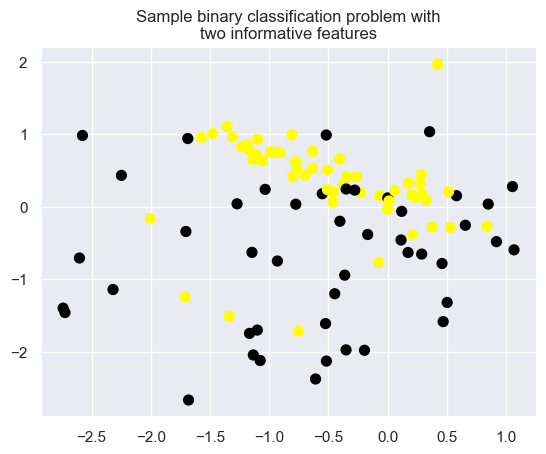

In [19]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# synthetic dataset for classification (binary)
plt.title('Sample binary classification problem with\ntwo informative features')
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)

plt.show()

In order to show the decision boundaries without the feature space, I retreived the following customized function `plot_two_class_knn()` from StackOverflow, that basically takes the X and y training values as parameters, as well as the k size and the weight and produces the colored plots I show in the slides.

It also takes the X and y test values as parameters to compute the accuracy of the classifier.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.patches as mpatches

def plot_two_class_knn(X, y, n_neighbors, weights, X_test, y_test):
    X_mat = X
    y_mat = y

    # Create color maps
    cmap_light = ListedColormap(['#FFFFAA', '#AAFFAA', '#AAAAFF','#EFEFEF'])
    cmap_bold  = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    #print(np.c_[xx.ravel(), yy.ravel()])
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    title = "Neighbors = {}".format(n_neighbors)
    if (X_test is not None):
        train_score = clf.score(X_mat, y_mat)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    patch0 = mpatches.Patch(color='#FFFF00', label='class 0')
    patch1 = mpatches.Patch(color='#000000', label='class 1')
    plt.legend(handles=[patch0, patch1])

    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.title(title)

    plt.show()

Let's try out different values of k for yourself to see what the effect is on the decision boundaries.

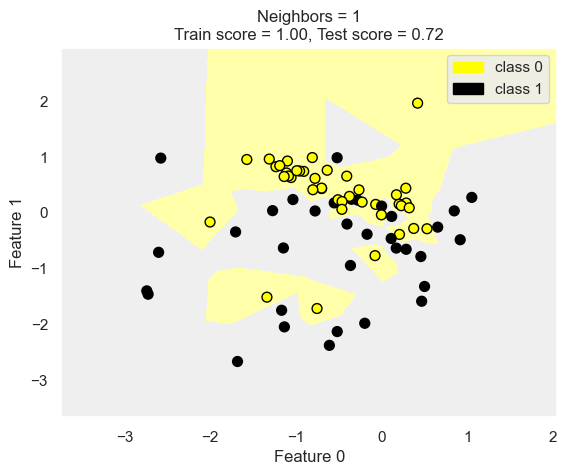

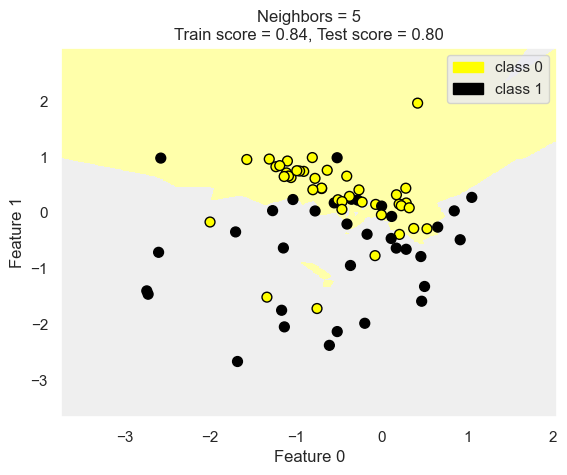

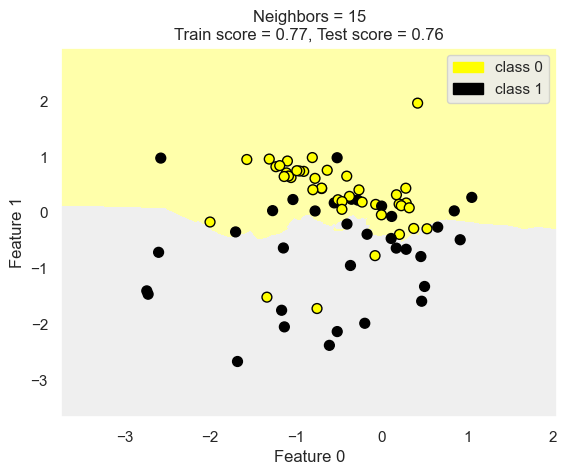

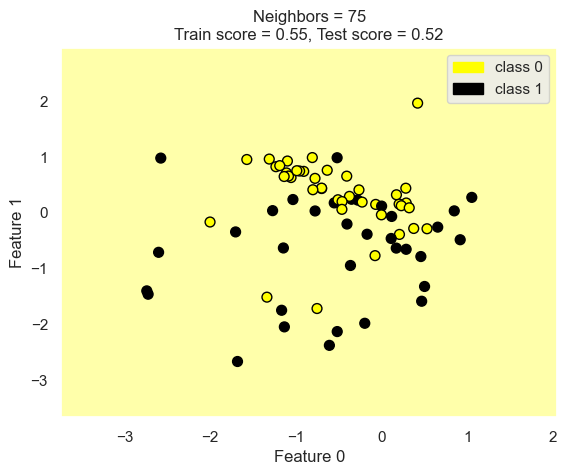

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 5, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 15, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 75, 'uniform', X_test, y_test) #what happens when k=<whole sample size>?

### Regression

The nearest neighbors approach isn't useful just for classification. You can use it for regression too.

Let's start with a basic regression example that has one informative input variable, one noisy linear output, and 100 data set samples.

Here's a plot of a data set using scatter plot with each point represented by one dot. The x-axis shows the future value, and the y-axis shows the regression target. To create this we use the `make_regression` function in `sklearn.datasets`.

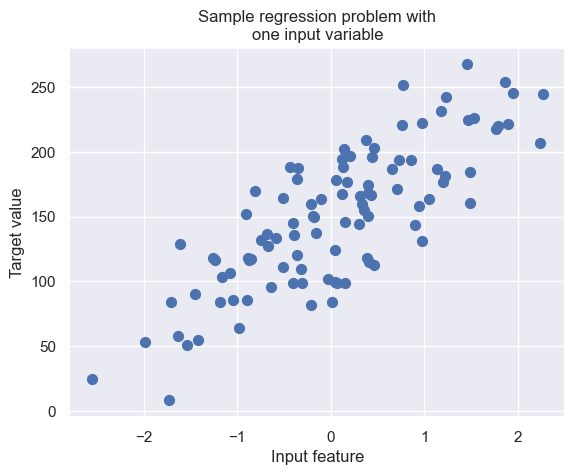

In [22]:
# synthetic dataset for simple regression
from sklearn.datasets import make_regression

plt.title('Sample regression problem with\none input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.xlabel('Input feature')
plt.ylabel('Target value')
plt.show()

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'.format(knnreg.score(X_test, y_test)))

[231.70974697 148.35572605 150.58852659 150.58852659  72.14859259
 166.50590948 141.90634426 235.57098756 208.25897836 102.10462746
 191.31852674 134.50044902 228.32181403 148.35572605 159.16911306
 113.46875166 144.03646012 199.23189853 143.19242433 166.50590948
 231.70974697 208.25897836 128.01545355 123.14247619 141.90634426]
R-squared test score: 0.425


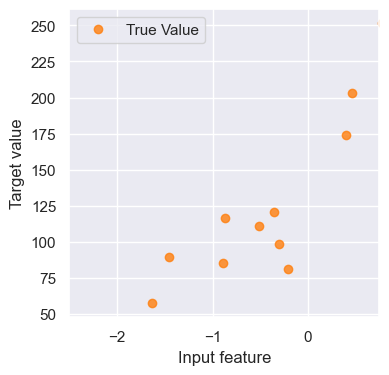

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

ax = plt.figure(figsize=(4,4))
plt.plot(X_train, y_train, 'o', label='True Value', alpha=0.8, color="tab:orange")
plt.xlim([-2.5, 0.75])
plt.xlabel('Input feature')
plt.ylabel('Target value')
plt.legend();

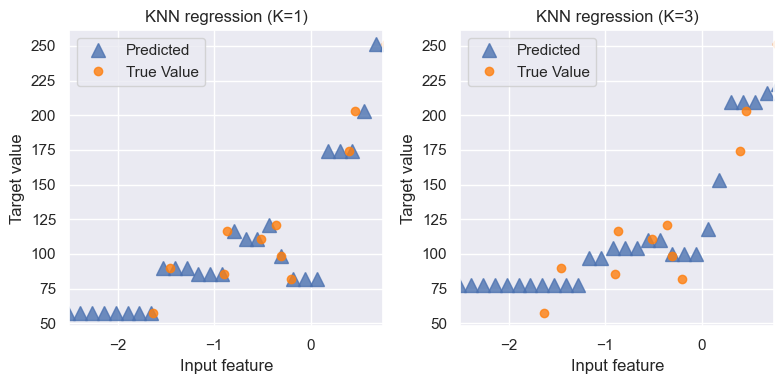

In [25]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8, color="tab:orange")
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()

plt.tight_layout()

### Regression model complexity as a function of K

Just as we did for classification, let's look at the connection between model complexity and generalization ability as measured by the r-squared training and test values on the simple regression dataset. The series of plots below shows how the KNN regression algorithm fits the data for k = 1, 3, 7, 15, and in an extreme case of k = 55, which represents almost half the training points. We can see the same pattern in model complexity for knn regression that we saw for knn classification. Namely, that small values of k give models with higher complexity, and large values of k result in simpler models with lower complexity.

Looking at the first subplot where k = 1, we find that the regression model fits the training data perfectly with an r-squared score of 1.0. If you look at it's rsuared value, however, you find that it's ability to predict the target values for new data samples is very bad, with a score of only 0.155.

As the value of k increases, again the training set score drops, but the model gets better at generalizing to new data and the test score goes up.

Finally in this series, the model with k = 15 has the best test set performance, with an r-squared score of 0.485. Increasing k much further however, to k = 55, results in both the training and test set scores dropping back down to lower levels, as the model now starts to under-fit. In other words, it's too simple to do well, even on the training data.

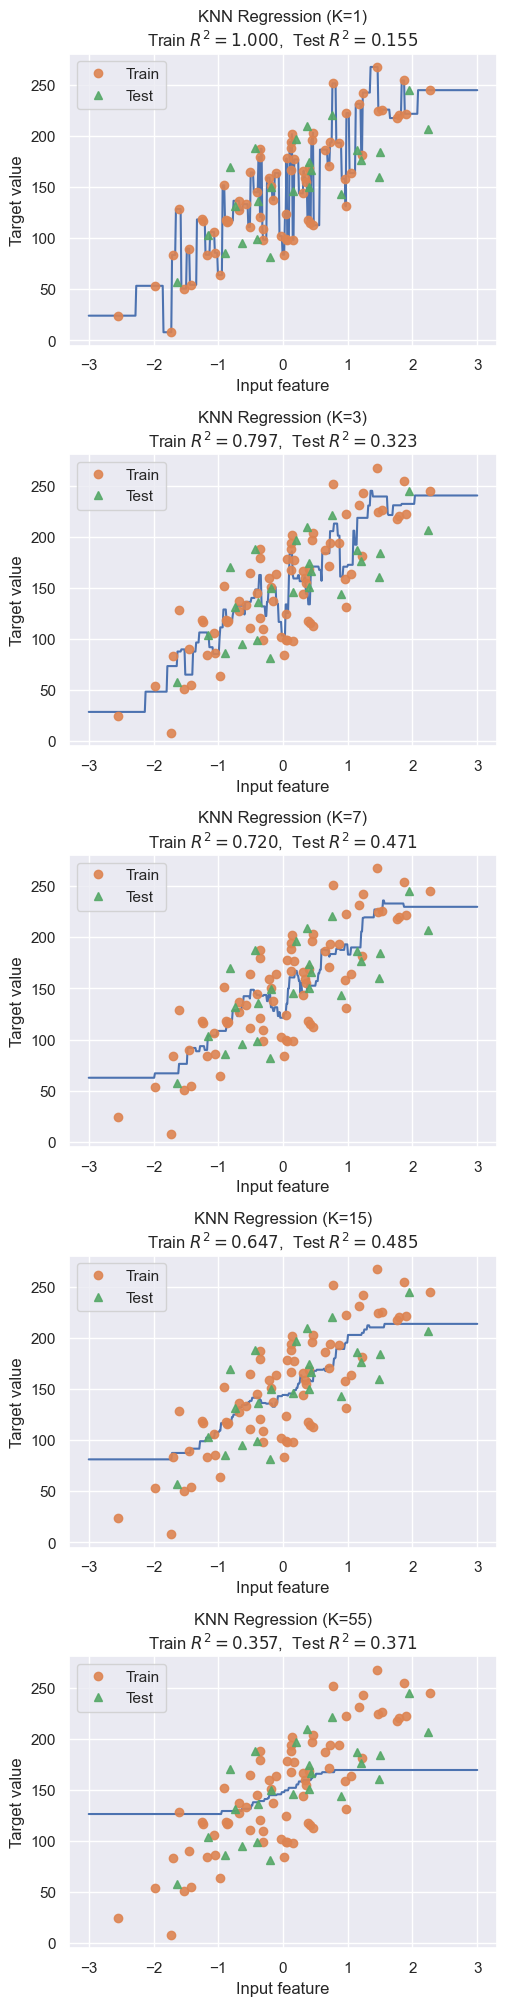

In [26]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\nTrain $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                        .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

##Linear Models for Regression

###Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,random_state = 0)

linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

linear model coeff (w): [45.70870465]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


###Linear regression: example plot

Finally, below is the code to plot the least-squares linear solution for this dataset.

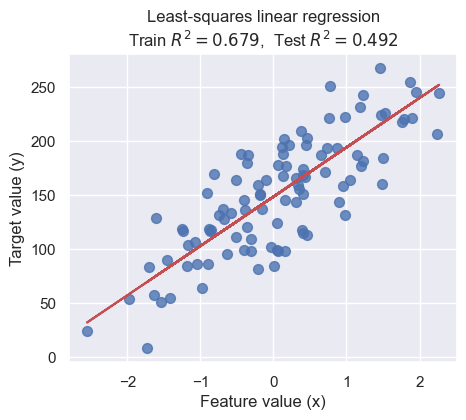

In [28]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
train_score = linreg.score(X_train, y_train)
test_score = linreg.score(X_test, y_test)
plt.title('Least-squares linear regression\nTrain $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'.format(train_score, test_score))
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

##Polynomial Regression

*Why would we use polynomial regression?*

To understand the need for polynomial regression, let’s look at a simple example with one feature (x) and one output (y).

Let's generate a random dataset as follows:

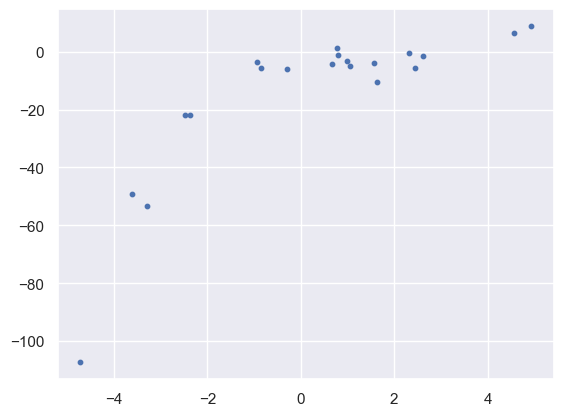

In [29]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=10)
plt.show()

Let's start by applying a linear regression model to this dataset:

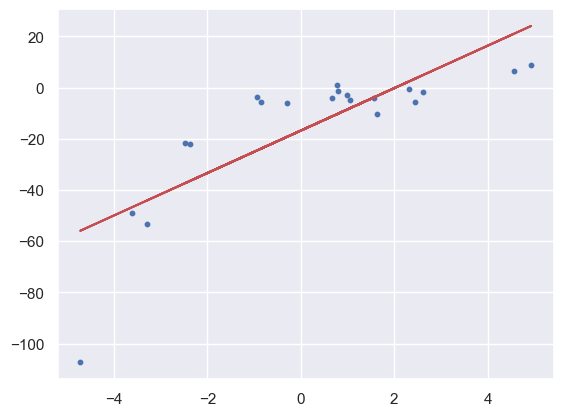

In [30]:
from sklearn.linear_model import LinearRegression

def generate_X_y():
  np.random.seed(0)
  x = 2 - 3 * np.random.normal(0, 1, 20)
  y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

  # transform the data to include another axis to reshape the array to the correct format
  x = x[:, np.newaxis]
  y = y[:, np.newaxis]
  return x,y

x,y = generate_X_y()

linreg = LinearRegression()
linreg.fit(x, y)
y_pred = linreg.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

We can see that the straight line is unable to capture the patterns in the data. This is an example of under-fitting.

Computing the RMSE and R²-score of the linear line gives:

In [31]:
from sklearn.metrics import mean_squared_error
import math

print('Linear Regression RMSE = {:.3f}'.format(math.sqrt(mean_squared_error(y, y_pred))))
print('Linear Regression R^2 = {:.3f}'.format(linreg.score(x, y)))

Linear Regression RMSE = 15.908
Linear Regression R^2 = 0.639


To convert the original features into their higher order terms we will use the `PolynomialFeatures` class provided by the `sklearn.preprocessing` library.

In [32]:
from sklearn.preprocessing import PolynomialFeatures

x,y = generate_X_y()

#to generate the polynomial features
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

print("Let's take the first three rows of X (one feature):")
print(x[0:3])
print("\nIf we apply polynomial transformation of degree 2, the feature vectors become:")
print(x_poly[0:3])

Let's take the first three rows of X (one feature):
[[-3.29215704]
 [ 0.79952837]
 [-0.93621395]]

If we apply polynomial transformation of degree 2, the feature vectors become:
[[ 1.         -3.29215704 10.83829796]
 [ 1.          0.79952837  0.63924562]
 [ 1.         -0.93621395  0.87649656]]


Next, we train the model using Linear Regression.

Since for the purpose of this exercise we are looking at a small dataset, I won't apply the train / test split here, and will just train the model on the whole dataset.

Polynomial Regression RMSE = 10.120
Polynomial Regression R^2 = 0.854



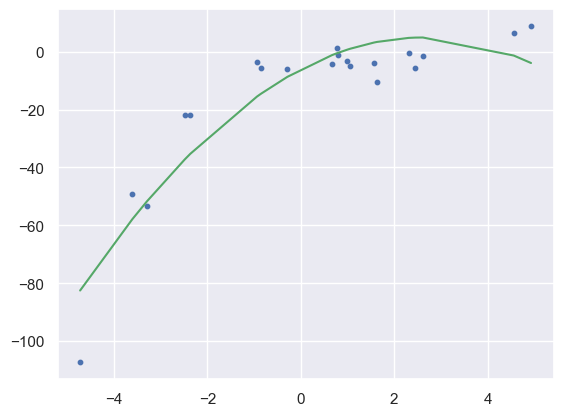

In [33]:
import operator
from sklearn.metrics import mean_squared_error, r2_score

linreg = LinearRegression()
linreg.fit(x_poly, y)
y_poly_pred = linreg.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)

print('Polynomial Regression RMSE = {:.3f}'.format(rmse))
print('Polynomial Regression R^2 = {:.3f}'.format(r2))

#let's plot it to see it!
print()
plt.scatter(x, y, s=10)

# sort the values of x before adding the line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x_sorted, y_poly_pred = zip(*sorted_zip)
plt.plot(x_sorted, y_poly_pred, color='g')
plt.show()

Let's make the polynomial regression cubic (i.e. set `degree = 3`)

Polynomial Regression RMSE = 3.450
Polynomial Regression R^2 = 0.983


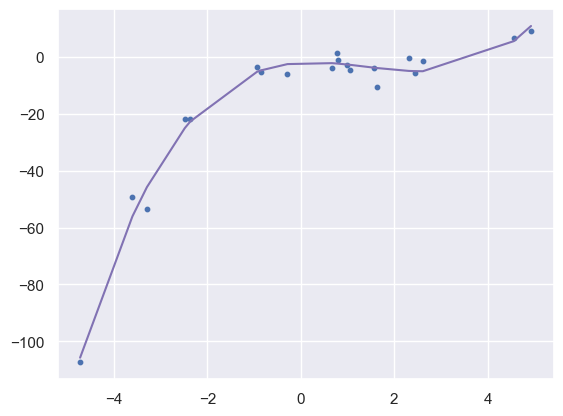

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

x,y = generate_X_y()

#to generate the polynomial features (degree=3)
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

linreg = LinearRegression()
linreg.fit(x_poly, y)
y_poly_pred = linreg.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)

print('Polynomial Regression RMSE = {:.3f}'.format(rmse))
print('Polynomial Regression R^2 = {:.3f}'.format(r2))

#let's plot it to see it!
plt.scatter(x, y, s=10)

# sort the values of x before adding the line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x_sorted, y_poly_pred = zip(*sorted_zip)
plt.plot(x_sorted, y_poly_pred, color='m')
plt.show()

What if we set `degree=20`?

Polynomial Regression (degree = 3) RMSE = 3.450
Polynomial Regression (degree = 3) R^2 = 0.983
Polynomial Regression (degree = 20) RMSE = 1.113
Polynomial Regression (degree = 20) R^2 = 0.998



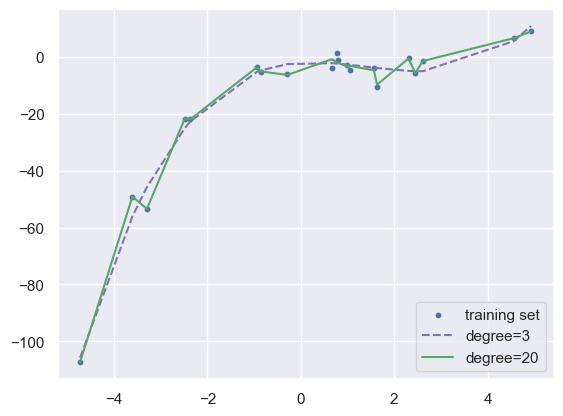

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

x,y = generate_X_y()

#let's plot it to see it!
plt.scatter(x, y, s=10, label="training set")

#####################################################
#to generate the polynomial features (degree = 3)
#####################################################
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

linreg = LinearRegression()
linreg.fit(x_poly, y)
y_poly_pred = linreg.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)

print('Polynomial Regression (degree = 3) RMSE = {:.3f}'.format(rmse))
print('Polynomial Regression (degree = 3) R^2 = {:.3f}'.format(r2))


# sort the values of x before adding the line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x_sorted, y_poly_pred = zip(*sorted_zip)
plt.plot(x_sorted, y_poly_pred, '--', color='m', label="degree=3")

#######################################################
#to generate the polynomial features (degree = 20)
#######################################################
polynomial_features= PolynomialFeatures(degree=20)
x_poly = polynomial_features.fit_transform(x)

linreg = LinearRegression()
linreg.fit(x_poly, y)
y_poly_pred = linreg.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)

print('Polynomial Regression (degree = 20) RMSE = {:.3f}'.format(rmse))
print('Polynomial Regression (degree = 20) R^2 = {:.3f}'.format(r2))
print()

# sort the values of x before adding the line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x_sorted, y_poly_pred = zip(*sorted_zip)
plt.plot(x_sorted, y_poly_pred, color='g', label="degree=20")
plt.legend(loc=4)
plt.show()

##A More Complex Polynomial Regression (with multiple features):

Let's create a synthetic dataset for a more complex regression, with 100 instances and 7 features.


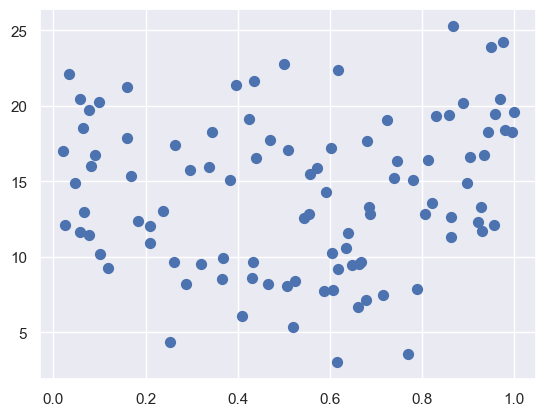

In [36]:
from sklearn.datasets import make_friedman1

X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7, random_state=0)

#to look at a plot of one feature in X against y
plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50);

Let's run the data on a linear regression and then a polynomial regression (`degree=2`) and compare the accuracies of the train and test datasets.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1,random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print("\n---------------------------------------------------")
print('Now we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)')
print("---------------------------------------------------")

poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,random_state = 0)

linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [ 4.42036739  5.99661447  0.52894712 10.23751345  6.5507973  -2.02082636
 -0.32378811]
linear model intercept (b): 1.543
R-squared score (training): 0.722
R-squared score (test): 0.722

---------------------------------------------------
Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)
---------------------------------------------------
(poly deg 2) linear model coeff (w):
[ 3.40951018e-12  1.66452443e+01  2.67285381e+01 -2.21348316e+01
  1.24359227e+01  6.93086826e+00  1.04772675e+00  3.71352773e+00
 -1.33785505e+01 -5.73177185e+00  1.61813184e+00  3.66399592e+00
  5.04513181e+00 -1.45835979e+00  1.95156872e+00 -1.51297378e+01
  4.86762224e+00 -2.97084269e+00 -7.78370522e+00  5.14696078e+00
 -4.65479361e+00  1.84147395e+01 -2.22040650e+00  2.16572630e+00
 -1.27989481e+00  1.87946559e+00  1.52962716e-01  5.62073813e-01
 -8.91697516e-01 -2.18481128e+00  1.37595426e+00 -4.90336041e+00
 -2.23535458e+00  1.38268439e+00 -